# 第 2 讲：求根问题

## 人口增长

建立模型

$$N(t)=N_0e^{\lambda t}+\frac{v}{\lambda}(e^{\lambda t}-1)$$

已知数据

- $N(0)=1000000$（人）
- $N(1)=1564000$（人）
- $v=435000$（人/年）
- $\Delta t = 1$（年）

求解方程（求出参数 $\lambda$）

$$1564000 = 1000000 e^\lambda + \frac{435000}{\lambda}(e^\lambda-1)$$


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def e(x, n=20):
    e_p = 0
    for i in range(n):
        e_p += x ** i / math.factorial(i)
    return e_p

In [3]:
def f(x, e_func=e, eps=1e-4):
    x = x or eps
    if e_func:
        p = e_func(x)
    else:
        p = math.exp(x)
    return p + 0.435 * (p - 1) / x - 1.564

In [4]:
def df(x, e_func=e, eps=1e-4):
    x = x or eps
    if e_func:
        p = e_func(x)
    else:
        p = math.exp(x)
    return p - 0.435 * (p - 1) / x / x + 0.435 * p / x

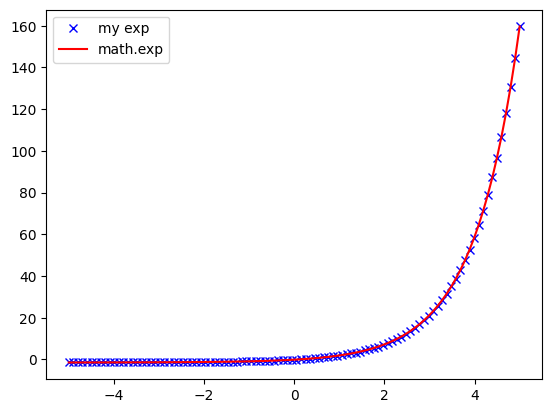

In [5]:
a, b = -5, 5
xs = np.linspace(a, b, 100)
ys = [f(x) for x in xs]
ys2 = [f(x, math.exp) for x in xs]
plt.plot(xs, ys, 'bx', label='my exp')
plt.plot(xs, ys2, 'r-', label='math.exp')
plt.legend()

## 求根算法

In [6]:
test_f = lambda x : x * x - 2
test_df = lambda x : 2 * x
test_g = lambda x : x / (x + 2) + 1

def tester(f, *args):
    while True:
        if f(*args):
            print("SUCCESS")
        else:
            print("FAIL")
        break

In [7]:
def bisection(f, a, b, t, n):
    '''
        root finding - bisection method
    '''
    
    i = 1
    fa = f(a)
    while i <= n:
        inc = (b - a) / 2
        p = a + inc
        fp = f(p)
        if math.isclose(fp, 0) or inc < t:
            print(f"The result is {p}") # success
            return True
        i = i + 1
        if fa * fp > 0:
            a = p
            fa = fp
        else:
            b = p
            
    print("At max iteration!") # fail
    return False

In [8]:
tester(bisection, test_f, 1., 2., 1e-8, 50)

The result is 1.4142135605216026
SUCCESS


In [9]:
def fixed_point(g, p0, t, n):
    '''
        root finding - fixed-point iteration
    '''
    
    i = 1
    while i <= n:
        p = g(p0)
        if math.fabs(p - p0) < t:
            print(f"The result is {p}") # success
            return True
        i = i + 1
        p0 = p
        
    print("At max iteration!") # fail
    return False

In [10]:
# f(x) = x^2 - 2
# x = g(x) = x / (x + 2) + 1

tester(fixed_point, test_g, 1., 1e-8, 50)

The result is 1.4142135605326258
SUCCESS


In [11]:
def newton(f, df, p0, t, n):
    '''
        root finding - Newton method
    '''
    
    i = 1
    while i <= n:
        p = p0 - f(p0) / df(p0)
        if math.fabs(p - p0) < t:
            print(f"The result is {p}") # success
            return True
        i = i + 1
        p0 = p
            
    print("At max iteration!") # fail
    return False

In [12]:
tester(newton, test_f, test_df, 1., 1e-8, 50)

The result is 1.4142135623730951
SUCCESS


In [13]:
def secant(f, p0, p1, t, n):
    '''
        root finding - secant method
    '''
    
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= n:
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if math.fabs(p - p1) < t:
            print(f"The result is {p}") # success
            return True
        i = i + 1
        p0 = p1
        q0 = q1
        p1 = p
        q1 = f(p)
            
    print("At max iteration!") # fail
    return False

In [14]:
tester(secant, test_f, 1., 2., 1e-8, 50)

The result is 1.4142135623730954
SUCCESS


In [15]:
def regula_falsi(f, p0, p1, t, n):
    '''
        root finding - regula falsi method
    '''
    
    i = 2
    q0 = f(p0)
    q1 = f(p1)
    while i <= n:
        p = p1 - q1 * (p1 - p0) / (q1 - q0)
        if math.fabs(p - p1) < t:
            print(f"The result is {p}") # success
            return True
        i = i + 1
        q = f(p)
        if q * q1 < 0:
            p0 = p1
            q0 = q1
        p1 = p
        q1 = q
            
    print("At max iteration!") # fail
    return False

In [16]:
tester(regula_falsi, test_f, 1., 2., 1e-8, 50)

The result is 1.4142135605326258
SUCCESS


## 回到人口增长

In [17]:
tester(bisection, f, a, b, 1e-8, 1000)

The result is 0.10099793784320354
SUCCESS


In [18]:
tester(newton, f, df, a, 1e-8, 1000)

The result is 0.1009979296857512
SUCCESS


In [19]:
tester(secant, f, a, b, 1e-8, 1000)

The result is -4.818414018454159
SUCCESS


In [20]:
tester(regula_falsi, f, a, b, 1e-8, 1000)

The result is 0.10099769959373296
SUCCESS


In [21]:
def g(x, e_func=e, eps=1e-4):
    x = x or eps
    if e_func:
        p = e_func(x)
    else:
        p = math.exp(x)
    return 0.435 * (p - 1) / (1.564 - p)

tester(fixed_point, g, 1., 1e-8, 100)

The result is -3.221416542224628e-08
SUCCESS


## 秦九韶算法

In [22]:
def poly_naive(a, x):
    p = 0
    for i, ai in enumerate(a):
        p += (x ** i) * ai
    return p

In [23]:
def poly_iter(a, x):
    p = 0
    xn = 1
    for ai in a:
        p += xn * ai
        xn *= x
    return p

In [24]:
def poly(a, x):
    p = a[-1]
    i = len(a) - 2
    while i >= 0:
        p = p * x + a[i]
        i -= 1
    return p

In [25]:
test_a = [-19, 7, -4, 6]
poly_funcs = (poly_naive, poly_iter, poly)
eval_x = 3

In [26]:
for f in poly_funcs:
    print(f(test_a, eval_x))

128
128
128


In [27]:
poly_iter.__name__

'poly_iter'

In [28]:
import timeit

time_report = {f.__name__: 
               timeit.timeit(f"{f.__name__}(test_a, eval_x)", 
                             number=100, 
                             globals=globals()) for f in poly_funcs
              }

In [29]:
time_report

{'poly_naive': 0.0001371019998259726,
 'poly_iter': 4.8101000174938235e-05,
 'poly': 5.1701000302273314e-05}